In [ ]:
#Introduction
#The Fashion MNIST dataset is a popular machine learning benchmark that consists of grayscale images of clothing items, each belonging to one of ten classes.
#This assignment focuses on implementing a Convolutional Neural Network (CNN) using Keras to classify these images into their respective categories. 
#The goal is to train a model that can accurately predict the type of clothing item based on the input image, enabling potential applications such as 
#targeted marketing or inventory management.

#The ten classes in the Fashion MNIST dataset, along with their corresponding class names, are as follows:
#Label 	Description
#- 0  -	T-shirt/top
#- 1  -	Trouser
#- 2  -	Pullover
#- 3  -	Dress
#- 4  -	Coat
#- 5  -	Sandal
#- 6  -	Shirt
#- 7  -	Sneaker
#- 8  -	Bag
#- 9  -	Ankle boot

In [ ]:
#Description of Steps Taken
#The following steps outline the process to build and evaluate a Convolutional Neural Network (CNN) for Fashion MNIST classification using
#Python and TensorFlow/Keras:

In [138]:
 #  import libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the Dataset
#Imported the fashion_mnist dataset from Keras.
#Split the data into training (x_train, y_train) and testing (x_test, y_test) sets.
#This dataset contains grayscale images of size 28x28 pixels and 10 target classes:
#T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot.

In [140]:
# Step 1: Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
#Preprocess the Data
#Reshaped the data to include a single channel (28, 28, 1) for grayscale images.
#Normalized pixel values by dividing by 255 to scale them to the range [0, 1].
# print for confirmation

In [142]:
# Step 2: Preprocess the data
# Normalize the pixel values to the range [0, 1]
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [144]:
# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [146]:
print(x_train.shape)  # Should be (60000, 28, 28, 1)
print(y_train.shape)  # Should be (60000,)
print(x_test.shape)   # Should be (10000, 28, 28, 1)
print(y_test.shape)   # Should be (10000,)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [ ]:
#Define the CNN Model
#Built a CNN using the Sequential API from TensorFlow/Keras:
#Layer 1: Conv2D with 32 filters of size (3, 3), ReLU activation.
#Layer 2: MaxPooling2D with a pool size of (2, 2).
#Layer 3: Conv2D with 64 filters of size (3, 3), ReLU activation.
#Layer 4: MaxPooling2D with a pool size of (2, 2).
#Layer 5: Flatten layer to convert 2D data into 1D vectors.
#Layer 6: Fully connected Dense layer with 128 units, ReLU activation, and a Dropout rate of 0.5.
#Output Layer: Fully connected Dense layer with 10 units and softmax activation for multi-class classification.

In [148]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

# Step 3: Define the CNN model
model = Sequential([
    Input(shape=(28, 28, 1)),  # Define input shape here
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes in Fashion MNIST
])

In [122]:
#Compile the Model
#Used the Adam optimizer to minimize the loss function.
#Loss function: sparse_categorical_crossentropy for multi-class classification.
#Metrics: Monitored model accuracy during training.
#Display attributes

In [154]:
# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [156]:
# Step 5: Train the model
history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=12,
    validation_split=0.2
)

Epoch 1/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.7171 - loss: 0.7807 - val_accuracy: 0.8652 - val_loss: 0.3641
Epoch 2/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.8532 - loss: 0.4042 - val_accuracy: 0.8797 - val_loss: 0.3260
Epoch 3/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.8768 - loss: 0.3418 - val_accuracy: 0.8901 - val_loss: 0.2956
Epoch 4/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.8917 - loss: 0.3026 - val_accuracy: 0.8994 - val_loss: 0.2709
Epoch 5/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.8971 - loss: 0.2827 - val_accuracy: 0.8990 - val_loss: 0.2800
Epoch 6/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9044 - loss: 0.2642 - val_accuracy: 0.9028 - val_loss: 0.2661
Epoch 7/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9083 - loss: 0.2423 - val_accuracy: 0.9104 - val_loss: 0.2469
Epoch 8/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9166 -

In [158]:
# Display the attributes of the history object.
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [128]:
#Evaluate the Model
#Evaluate the trained model on the test set (x_test, y_test).
#Printed the test accuracy to assess the model's generalization capability.

In [160]:
# Step 6: Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9050 - loss: 0.2810
Test Accuracy: 0.91


In [162]:
# Label names for Fashion MNIST
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
#Make Predictions
#Made predictions for 5 sample images from the test set.
#Visualized the test images along with their predicted and true class labels using the class_names dictionary.

In [164]:
# Step 7: Make predictions on test data
predictions = model.predict(x_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


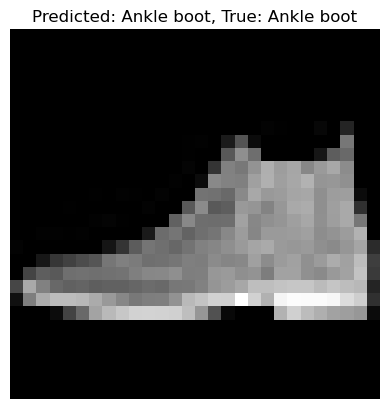

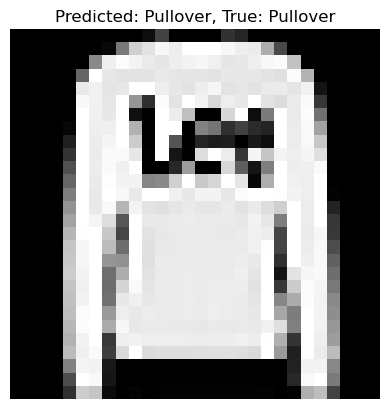

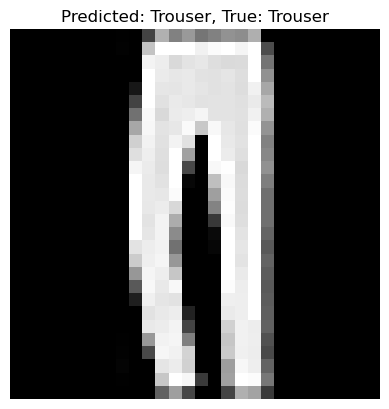

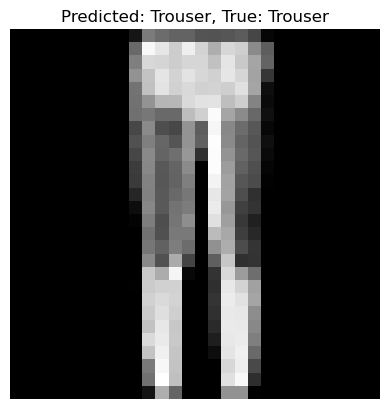

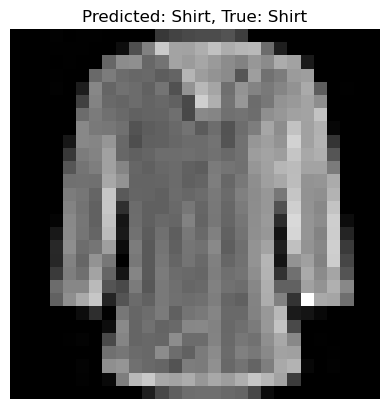

In [166]:
# Visualize predictions
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')

    predicted_label = np.argmax(predictions[i])  # Get predicted class index
    true_label = np.argmax(y_test[i])  # Convert one-hot encoded label to class index

    plt.title(f"Predicted: {class_names[predicted_label]}, True: {class_names[true_label]}")
    plt.axis('off')
    plt.show()